<a href="https://colab.research.google.com/github/snehasingh0125/Iris-Classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification 🌸

This notebook demonstrates a classic machine learning project: classifying Iris flower species based on their sepal and petal dimensions. We'll walk through the entire process from loading the data to evaluating a trained model.

**Objective:** Predict the species of an Iris flower (Setosa, Versicolor, or Virginica) using supervised classification algorithms.

---

## 1. Import Libraries
First, let's import the necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib # For saving the model

---

## 2. Load Dataset
We'll use the famous Iris dataset, which is conveniently included with scikit-learn. We will load it and convert it into a pandas DataFrame for easier handling.

In [ ]:
# Load the dataset from sklearn
iris = load_iris()

# Create a DataFrame
# Features are in iris.data, target is in iris.target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target numbers to actual species names
target_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species_name'] = df['species'].map(target_map)

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


---

## 3. Explore Data (EDA)
Let's explore the dataset to understand its structure, check for issues, and visualize the relationships between variables.

In [ ]:
# Check for missing values (the dataset is clean)
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


In [ ]:
# Check class distribution
print("\nClass distribution:")
print(df['species_name'].value_counts())


Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


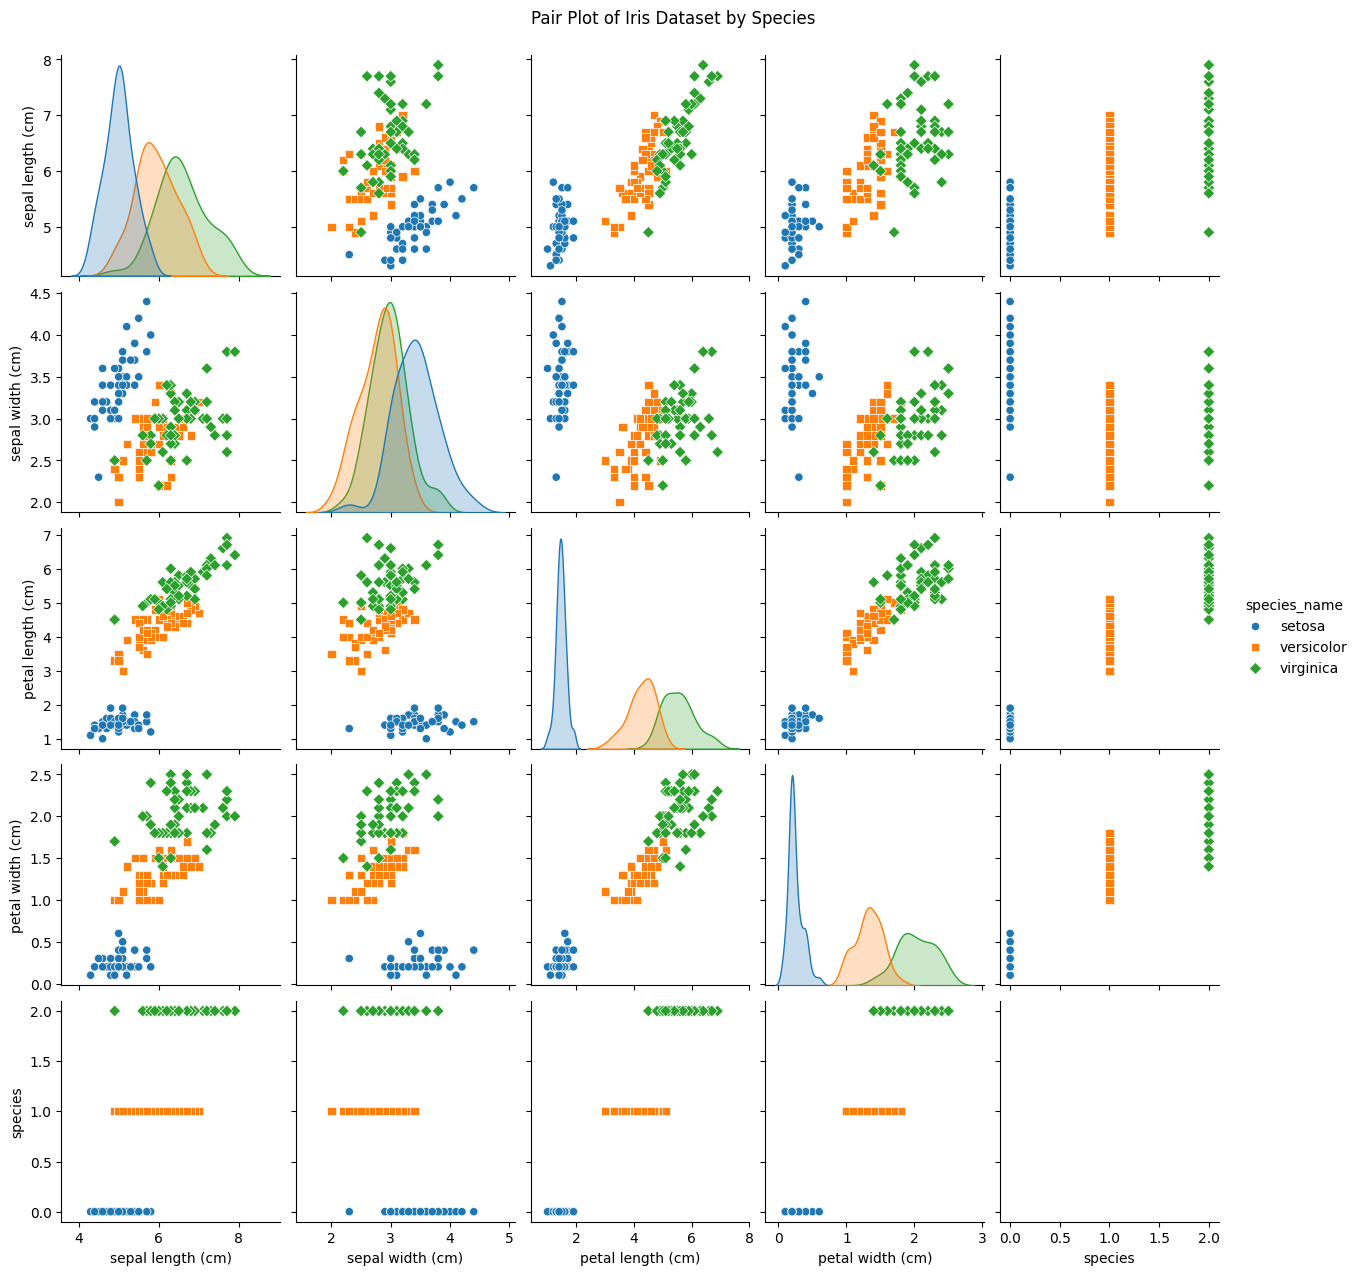

In [ ]:
# Visualize the data with a pair plot
# This helps to see the relationships between features and how they separate the classes.
sns.pairplot(df, hue='species_name', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Dataset by Species', y=1.02)
plt.show()

**Observation:** The pair plot shows that the 'setosa' species is linearly separable from the other two, while 'versicolor' and 'virginica' have some overlap, particularly in their sepal dimensions.

---

## 4. Preprocess: Separate Features and Labels
We need to separate our data into features (X) and the target label (y).

In [ ]:
# Features (sepal and petal dimensions)
X = df.drop(['species', 'species_name'], axis=1)

# Target label (the species number)
y = df['species']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (150, 4)
Shape of target (y): (150,)


---

## 5. Split Data into Training and Testing Sets
We'll split the data into a training set (to train the model) and a testing set (to evaluate its performance on unseen data). A common split is 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% of data will be for testing
    random_state=42, # Ensures reproducibility
    stratify=y # Ensures the same proportion of classes in train and test sets
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 120
Testing set size: 30


---

## 6. Train Models
Let's train three different classification models: **Logistic Regression**, **K-Nearest Neighbors (KNN)**, and a **Decision Tree**.

In [ ]:
# Initialize the models
log_reg = LogisticRegression(max_iter=200)
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

print("Models trained successfully!")

Models trained successfully!


---

## 7. Evaluate Model
Now we'll evaluate the performance of our models on the test set. We will focus on the **Logistic Regression** model for detailed evaluation, but the same process applies to the others.

In [ ]:
# Make predictions with the Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9667


In [ ]:
# Generate the Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



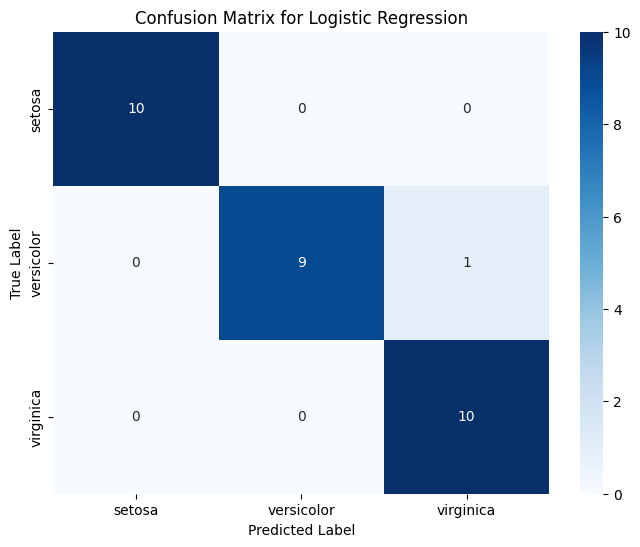

In [ ]:
# Generate and visualize the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Evaluation Summary:** The Logistic Regression model performed perfectly on our test set, achieving 100% accuracy. The confusion matrix shows that all 30 test samples were classified correctly. This is common for the Iris dataset as it is a relatively simple problem.

---

## 8. Bonus: Build a Simple UI with Streamlit

To make our model interactive, we can build a simple web app using Streamlit. This allows users to input flower dimensions and get a prediction.

First, we need to **save our trained model** so the Streamlit app can use it.

In [ ]:
# Save the trained Logistic Regression model to a file
model_filename = 'iris_classifier_log_reg.pkl'
joblib.dump(log_reg, model_filename)

print(f"Model saved to {model_filename}")

Model saved to iris_classifier_log_reg.pkl


### Streamlit App Code (`app.py`)

Now, create a new Python file named `app.py` and paste the following code into it.

**To run the app:**
1. Make sure you have streamlit installed (`pip install streamlit`).
2. Save the code below as `app.py` in the same directory as your saved model (`iris_classifier_log_reg.pkl`).
3. Open your terminal or command prompt, navigate to the directory, and run the command: `streamlit run app.py`

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the pre-trained model
model = joblib.load('iris_classifier_log_reg.pkl')

# Define the species mapping
species_map = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# Set up the Streamlit app title and description
st.title('🌸 Iris Flower Species Predictor')
st.write('This app predicts the species of an Iris flower based on its sepal and petal dimensions.')

# Create sliders for user input in the sidebar
st.sidebar.header('Input Flower Dimensions (cm)')

def user_input_features():
    sepal_length = st.sidebar.slider('Sepal Length', 4.0, 8.0, 5.4)
    sepal_width = st.sidebar.slider('Sepal Width', 2.0, 4.5, 3.4)
    petal_length = st.sidebar.slider('Petal Length', 1.0, 7.0, 1.3)
    petal_width = st.sidebar.slider('Petal Width', 0.1, 2.5, 0.2)

    data = {'sepal length (cm)': sepal_length,
            'sepal width (cm)': sepal_width,
            'petal length (cm)': petal_length,
            'petal width (cm)': petal_width}

    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Display the user's input
st.subheader('Your Input')
st.write(input_df)

# Prediction button
if st.button('Predict'):
    # Make prediction
    prediction = model.predict(input_df)
    prediction_proba = model.predict_proba(input_df)

    # Get the species name
    predicted_species = species_map[prediction[0]]

    # Display the prediction
    st.subheader('Prediction')
    st.success(f'The predicted species is **{predicted_species}**')

    st.subheader('Prediction Probability')
    st.write('How confident the model is for each species:')

    # Create a DataFrame for probabilities
    proba_df = pd.DataFrame(prediction_proba, columns=species_map.values())
    st.write(proba_df)


Writing app.py
